In [3]:
# Import the libraries and dependencies:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [4]:
# ASSESSING MODEL PERFORMANE WITH PYTHON
# Now that we have a basic understanding of the metrics that we use to evaluate our classification models, let's have Python calculate them for us.
# We'll follow our usual model-fit-predict-evaluate pipeline.
# As before, the model that we'll use is Logistic Regression.
# But because we'll examine various metrics - the accuracy, precision, recall, and F1 score - we'll focus more on the evaulation stage.

In [5]:
# ON THE JOB
# Sometimes in the workplace, people use the terms library and module interchangeably.
# This is because a library can be a collection of packages, and a package is a collection of modules.
# As a result, it's possible to combine various modules to create a library.

In [6]:
# READ IN AND PLOT THE DATA
# Let's continue with our example of predicting fraudulent credit card transactions.
# The dataset that we'll use has 1000 regular card swipes and 50 fraudulent transactions.
# We therefore need to classify two categories.
# Once we read in the data, we can use the scatter function from `pyplot`.
# The dataset has two features to use for prediction: `GEO_Score` and `PROD_Score`.
# These features can predict fraud for the following reasons:
    # 1. The `GEO_Score` indicates the distance of a card user from their normal geographical location. A sudden purchase in a different location might indicate fraud.
    # 2. The `PROD_Score` indicates the unsualness of the purchase type for the card user, based on thier historical purchasing habits.
    
# Read the credit card transactions into a DataFrame called cc_df:
cc_df = pd.read_csv(
    Path('fraud_transactions.csv')
)

# Review the DataFrame:
display(cc_df.head())
display(cc_df.tail())

,GEO_Score,PROD_Score,y
0,19.997056,0.102230,0
1,7.076726,-3.820771,0
2,-17.707267,-3.430517,1
3,13.190588,-7.243853,0
4,3.936697,-4.589524,0


,GEO_Score,PROD_Score,y
1045,4.664720,-6.148653,0
1046,7.703755,-4.453640,0
1047,-21.402688,-1.311240,1
1048,0.432376,-6.123579,0
1049,4.565415,1.013545,0


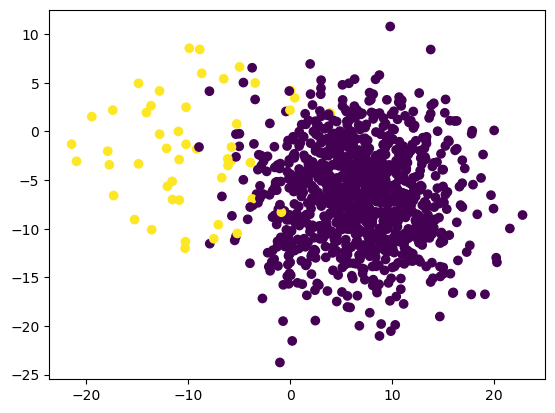

In [10]:
# Note that in addition to the two columns for the two features, a third column (named 'y') denotes whether a particular transaction was fraudulent.
# A value of 0 means that the transaction wasn't fraud, a value of 1 denotes that it was fraud.
# Let's now plot the two features and set the labels (fraud or not fraud) as the colors.
# We use the `scatter` function's `c` parameter to set the shade of the color.
# This parameter accepts a list of values as its argument and chooses a distinct number of color shades to match the distinct number of labels.

# Scatter plot:
plt.scatter(
    # One feature on the x-axis:
    x=cc_df['GEO_Score'],
    # Another feature on the y-axis:
    y=cc_df['PROD_Score'],
    # And, the y variable displayed as the color:
    c=cc_df['y']
)

In [11]:
# Note that the plot has two clusters of data. 
# The left cluster appears to be yellow, and the right cluster is purple.
# Because the color represents whether a card swipe was fraud (yellow) or not fraud (purple), we can observe that the transactions have been clustered into groups that closely identify with the transactions types.
# The fraud transactions are clustered together, as the non fraud transactions are clustered together.
# This means that the geography and product features have categorized the data pretty well.
# Though is doesn't appear on the plot, the x and y axes represent each feature.
# The next step is to fit a model to help automate and improve this categorization process.

In [12]:
# FIT THE MODEL
# We separate the data from our transactions DataFrame into the tow features of our model: y and X.
# The X column includes all the features from our DataFrame, except the 'y' column that we're already using.

# Separate the data into y and X:
y = cc_df['y']

# the X column should be all the features:
X = cc_df.drop(columns='y')

In [13]:
# To fit the model, we first use the `train_test_split` to split the feature and label sets into training and testing sets.
# We can then fit a logistic regression model to the training set.

# Split into testing and training sets:
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Train the logistic regression classifier:
logistic_regression_model = LogisticRegression()

# Fit the model:
logistic_regression_model.fit(X_train, y_train) 

LogisticRegression()

In [15]:
# MAKE PREDICTIONS
# Now that we fit the model, we can call its `predict` function for both the training and testing sets.
# That is, we make predictions for both the training features (X_train) set and the tesing features (X_test) set.
# This will produce a list of values that the model predicts.

# Generate training predictions:
training_predictions = logistic_regression_model.predict(X_train)

# Generate testing predictions:
testing_predictions = logistic_regression_model.predict(X_test)

# NOTE
# All the supervised learning models that we'll explore use this same process to create predictions.
# Practice the process until it becomes second nature.

# Remember that we'll always use the same stages throughout this module.
# Choose a model, fit the model to the data, make predictions, and then evaluate the quality of those predictions.
# Because the stages remain the same, much of the code also remains the same.
# Usually, the one stage that you might need to change is choosing a model (for example, logistic regression).

In [18]:
# EVALUATE THE MODEL WITH A CONFUSION MATRIX
# Now that we have some predicted values, we can evaluate how this model performed.
# The `confusion_matrix` module from scikit-learn accepts the predicted values and calculates the confusion matrix.
# We import the relevant module, calculate the confusion matrix, and then print the confusion matrix.

# Import the module:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix:
training_matrix = confusion_matrix(y_train, training_predictions)
print(training_matrix)

# Now that we have our confusion matrix, we can use it to manually calculate other metrics, such as precision, recall, and F1 score.
# However, we can make that step easier by using another module from scikit-learn: `classification_report`.

[[749   4]
 [ 11  23]]


In [19]:
# GENERATE A CLASSIFICATION REPORT
# Although we can manually calculate the metrics for our model, the scikit-learn `classification_report` module does the task for us.

# Import the module:
from sklearn.metrics import classification_report

# Save a classification report:
training_report = classification_report(y_train, training_predictions)

# View the output:
print(training_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       753
           1       0.85      0.68      0.75        34

    accuracy                           0.98       787
   macro avg       0.92      0.84      0.87       787
weighted avg       0.98      0.98      0.98       787



In [20]:
# OUTPUT BREAKDOWN
# Note that the classification report calculates the accuracy, precision, recall, and F1 Score for each class.
# In our example about fraud transactions, we can use the classification report to determine how well the model performed for each class.
# This benefits us when we evaluate a model with one class that's much larger than the other.
# Also, notice that the 'support' column has the number of instances for each class label found in the dataset.
# The support values, combined with the values associated with the precision, recall, and F1 Score, tell us the exact number of instances in each category that the model predicted.
# For example, by referencing the recall category for th 1 class, we can calculate that the model correctly predicted about 25 (25.5) instances (34 * 0.75).

In [21]:
# To complete the evaluation, we now want to generate a report for the testing data.
# Remember that the testing data helps us understand how well the model performs on data that it never trained with.
# This gives us some sense of how we might use the model on new data or in an environment where fraud transaction data is being monitored in real time.

# Save the confusion matrix for the test labels:
testing_matrix = confusion_matrix(y_test, testing_predictions)

# Save the classification report for the test labels:
testing_report = classification_report(y_test, testing_predictions)

# View the output:
print(testing_matrix)
print(testing_report)

[[246   1]
 [  2  14]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       247
           1       0.93      0.88      0.90        16

    accuracy                           0.99       263
   macro avg       0.96      0.94      0.95       263
weighted avg       0.99      0.99      0.99       263



In [ ]:
# BREAKDOWN
# Note that the precision and the recall for the 0 class (non-fraud transactions) is much better than the results for the 1 class (fraud transactions).
# For example, the precision for the 0 is 0.99, meaning 99% of the 0 value predictions were correct.
# By contrast, the precision for the 1 value, was 93%, which isn't far off.
# In the next lesson, we'll learn how to adjust our models to better predict both classes at the same time.
# So far, you've stepped thorugh the entire process for supervised machine learning.
# This includes deciding on a model, fitting that model to data, predicting new data, and evaluating how well the model worked.
# Much of what's lef about supervised machine learning just involves variations of this main process.
# In fact, most of the code you just learned will stay the same - even though you'll learn to apply more advanced supervised learning techniques.